In [57]:
%load_ext autoreload
%autoreload 1
%aimport funciones
# %reset
# Para visualización en notebook
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['font.size'] = 22
from IPython.display import Audio, Markdown, Image
import pylab
import seaborn as sns

# Números y Datos
import numpy as np
import pandas as pd

# Archivos
import urllib.request
import glob

# Análisis de sonido
import spotipy 

# Machine learning
# importar los paquetes para clustering
from sklearn.preprocessing import StandardScaler

# To work with categorical types
from pandas.api.types import CategoricalDtype

# Clustering (scipy)
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster

# Clustering (sklearn)
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import adjusted_rand_score, silhouette_score, silhouette_samples
from sklearn.neighbors import NearestNeighbors

from sklearn.metrics.pairwise import euclidean_distances

from funciones import plot_silhouette
from funciones import plot_silhouettes_and_sses
from funciones import get_silhouette_avg
from funciones import get_sse
from funciones import vanDongen
from funciones import plot_all_silhouettes_and_sses

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import MDS, Isomap, SpectralEmbedding, TSNE

from umap import UMAP

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Se cargan los datasets.

In [58]:
# Estandarizando de una manera o de la otra, los resultados son bastante distintos
scaler = MinMaxScaler(feature_range=(0,1))
#scaler = StandardScaler()

In [59]:
metadata_original = pd.read_csv('../data/metadata.csv', index_col='id')
audio_features_original = pd.read_csv('../data/audio_features.csv', index_col='id')
audio_analysis_original = pd.read_csv('../data/audio_analysis.csv', index_col='id')

In [60]:
audio_analysis_original.head()

,timbre_mean_0,timbre_mean_1,timbre_mean_2,timbre_mean_3,timbre_mean_4,timbre_mean_5,timbre_mean_6,timbre_mean_7,timbre_mean_8,timbre_mean_9,...,pitch_std_2,pitch_std_3,pitch_std_4,pitch_std_5,pitch_std_6,pitch_std_7,pitch_std_8,pitch_std_9,pitch_std_10,pitch_std_11
id,,,,,,,,,,,,,,,,,,,,,
3zyeX4u4HUOC3NayEJOyck,23.750138,-71.831506,34.037760,-11.890486,68.720537,-40.249553,-4.509055,5.458782,-6.528807,-0.103575,...,0.259376,0.297306,0.142406,0.272180,0.314002,0.219275,0.326560,0.235407,0.300180,0.258970
1EGN5k53fIAW1GOI8anTgx,28.434484,-158.420091,-13.479035,2.099088,37.263083,-33.527118,-8.094617,9.133336,-9.983395,-4.161041,...,0.223848,0.023184,0.032176,0.123053,0.451997,0.052372,0.335564,0.197335,0.028089,0.263795
7IAFc5iQti2tzob7Uo7N1Y,38.296167,-22.901114,34.280582,64.844476,27.589553,-14.747450,1.047695,-6.404568,-3.693400,4.374142,...,0.290893,0.226319,0.234516,0.315895,0.248951,0.292251,0.317714,0.288648,0.302568,0.196480
70nMUxP46mAcjW5iRpRiyN,27.320934,-66.295091,13.557211,-21.348007,29.636800,-26.948148,-15.031401,1.240677,-11.373799,-4.340720,...,0.207255,0.336050,0.291768,0.261196,0.301601,0.279206,0.337048,0.217345,0.264163,0.338455
2MgufCKlDELms5BSqaIcp1,35.147885,-81.618764,-65.966133,-8.663929,35.478043,-27.022224,-0.074410,-9.731050,-0.547309,0.656855,...,0.223338,0.249499,0.258368,0.308948,0.277571,0.211777,0.300871,0.303247,0.238082,0.199022


Se seleccionan únicamente las variables numéricas

In [61]:
audio_features = audio_features_original[['acousticness','danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness','loudness', 'speechiness', 'tempo', 'valence']]

Se estandarizan ambos datasets

In [62]:
audio_features_norm = pd.DataFrame(scaler.fit_transform(audio_features))
audio_analysis_norm = pd.DataFrame(scaler.fit_transform(audio_analysis_original))

In [63]:
audio_features_norm.dtypes

0    float64
1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
7    float64
8    float64
9    float64
dtype: object

In [64]:
audio_features_norm.shape

(2206, 10)

In [65]:
audio_analysis_norm.head()

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,0.293534,0.470621,0.632416,0.381188,0.721349,0.353755,0.431699,0.501533,0.548756,0.395681,...,0.544730,0.650222,0.276280,0.592355,0.675973,0.473461,0.726325,0.512629,0.658383,0.577598
1,0.393688,0.269063,0.496371,0.467851,0.508667,0.419074,0.397258,0.542375,0.501928,0.304899,...,0.460143,0.000000,0.018996,0.212364,1.000000,0.071208,0.748176,0.420213,0.001562,0.589502
2,0.604538,0.584519,0.633111,0.856546,0.443265,0.601546,0.485074,0.369673,0.587192,0.495866,...,0.619768,0.481841,0.491269,0.703744,0.523225,0.649341,0.704855,0.641864,0.664147,0.423409
3,0.369880,0.483508,0.573778,0.322601,0.457106,0.482998,0.330627,0.454649,0.483080,0.300878,...,0.420637,0.742124,0.624898,0.564365,0.646854,0.617900,0.751780,0.468784,0.571438,0.773719
4,0.537226,0.447839,0.346096,0.401176,0.496598,0.482278,0.474296,0.332699,0.629838,0.412695,...,0.458928,0.536823,0.546942,0.686044,0.590428,0.455389,0.663975,0.677301,0.508479,0.429681


# Experiencia 1: KMeans

## audio_features

Para audio_features, se determina la cantidad de clusters utilizando silhuette y SSE.

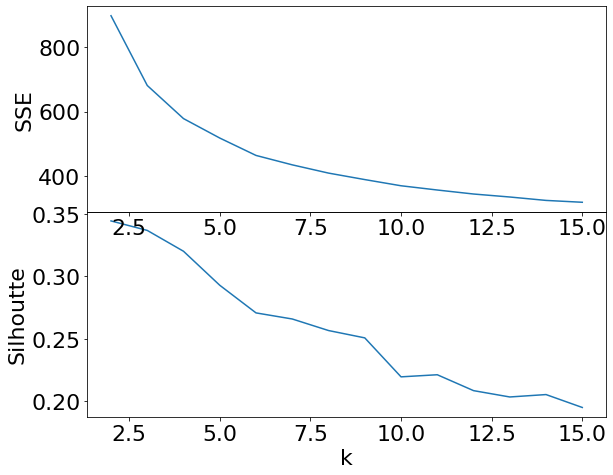

In [66]:
sse_audio_features, sil_audio_features  = plot_silhouettes_and_sses(audio_features_norm, 15)

¿Cuál sería el k ideal? El quiebre de SSE lo tenemos más o menos en 5 o en 6. Con valores más altos de k el silhouette baja demasiado.

In [67]:
get_silhouette_avg(audio_features_norm, 5)

0.29294845736833974

In [68]:
get_silhouette_avg(audio_features_norm, 6)

0.2707868255735725

El silhouette promedio obtenido en 5 es mayor que en 6. Ya con 7 y 8 el silhouette parece bajar demasiado y no obtenemos mucha ganancia en el SSE.

In [69]:
get_sse(audio_features_norm, 5)

517.8416072039162

In [70]:
get_sse(audio_features_norm, 6)

463.98992691664824

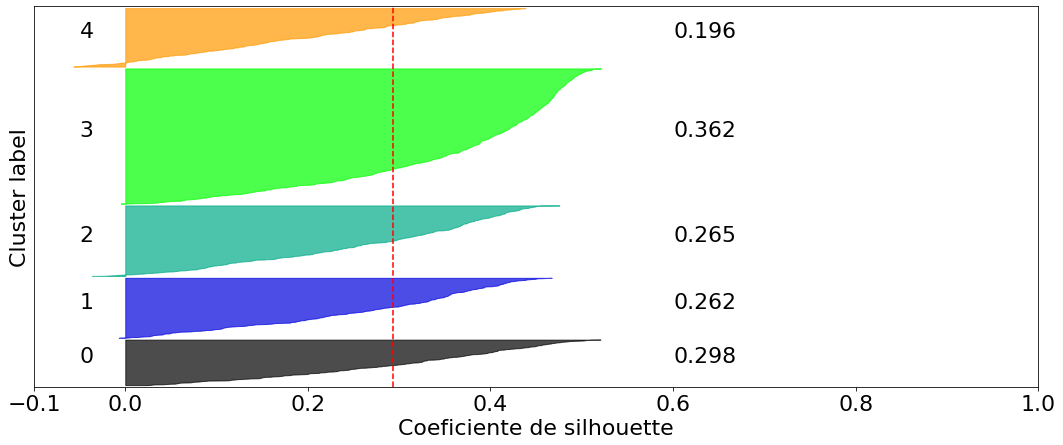

In [71]:
plot_silhouette(audio_features_norm, 5)

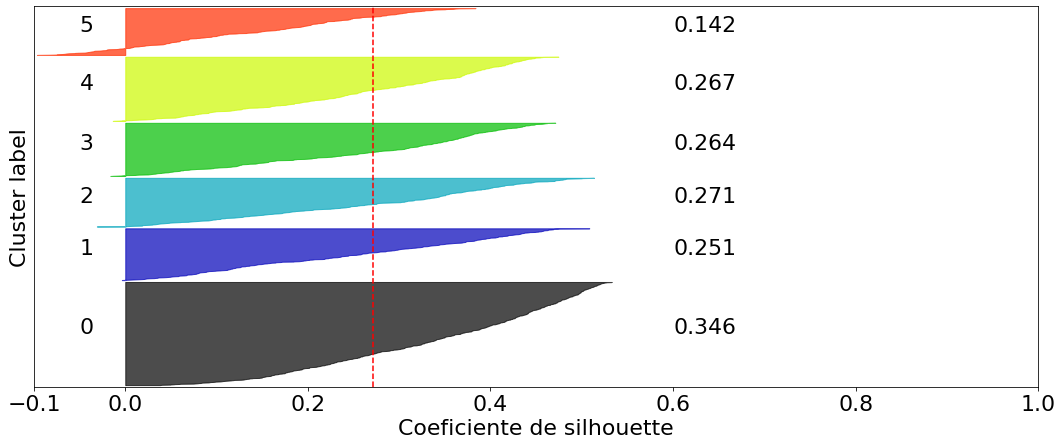

In [72]:
plot_silhouette(audio_features_norm, 6)

Conclusión: Estandarizado el dataset, da bastante mal. Para audio_features, los resultados sin estandarizar dan mucho mejor.

## audio_analysis

Para audio_analysis, se determina la cantidad de clusters utilizando silhuette y SSE.

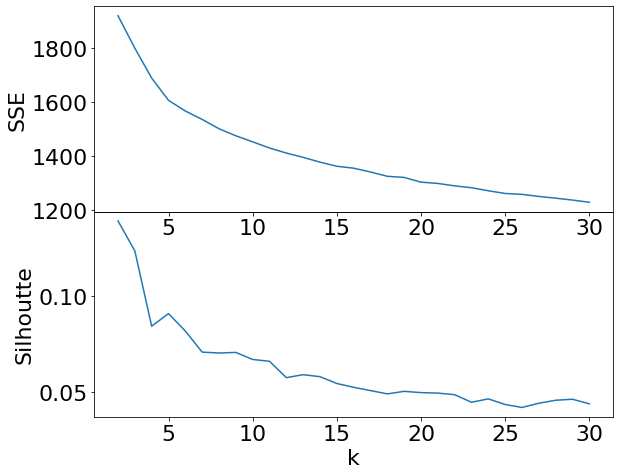

In [73]:
sse_audio_analysis, sil_audio_analysis = plot_silhouettes_and_sses(audio_analysis_norm, 30)

¿Qué valor de k podría ser mejor? Pareciera estar entre k = 3 y k = 10.

In [74]:
sils_sses = []
for k in range(3, 11):
    sils_sses.append([k, get_silhouette_avg(audio_analysis_norm, k), get_sse(audio_analysis_norm, k)])
pd.DataFrame(sils_sses, columns=['k', 'silhouette', 'sse'])

,k,silhouette,sse
0,3,0.123432,1798.661982
1,4,0.084217,1688.336896
2,5,0.090791,1606.214556
3,6,0.081706,1566.819755
4,7,0.070712,1535.792791
5,8,0.070242,1501.379413
6,9,0.070556,1475.288718
7,10,0.066881,1453.020668


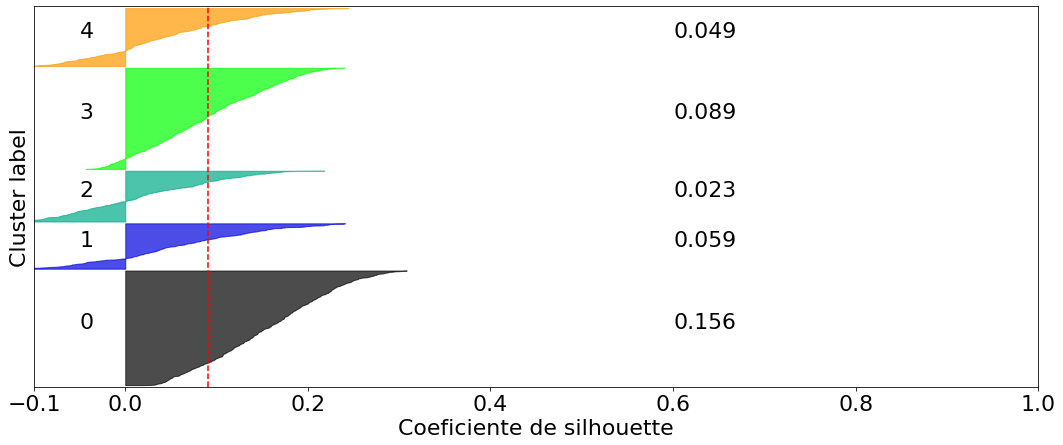

In [75]:
plot_silhouette(audio_analysis_norm, 5)

## audio_features y audio_analysis

Para ambos dataset mergeados, se determina la cantidad de clusters utilizando silhuette y SSE, estandarizando el merge previamente.

In [76]:
audio_tracks = pd.merge(audio_features, audio_analysis_original, how = 'inner', on = 'id')
audio_tracks = pd.DataFrame(scaler.fit_transform(audio_tracks))
audio_tracks.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.960843,0.548122,0.082639,0.107589,0.001237,0.124419,0.585975,0.046954,0.481591,0.314541,...,0.802287,0.376643,0.777766,0.706363,0.427796,0.653960,0.540056,0.731551,0.460954,0.575116
1,0.956827,0.496479,0.080985,0.031669,0.000004,0.082086,0.465891,0.067078,0.444450,0.158519,...,0.408663,0.608343,0.716047,0.463458,0.659931,0.517344,0.739438,0.671177,0.431654,0.866917
2,0.992972,0.395540,0.055235,0.149656,0.913481,0.334022,0.524560,0.021574,0.300881,0.156439,...,0.417869,0.625047,0.498719,0.783958,0.493448,0.757215,0.774316,0.475171,0.792816,0.662595
3,0.174695,0.474178,0.240354,0.773642,0.706237,0.695405,0.764218,0.224075,0.494300,0.487206,...,0.593346,0.514347,0.674562,0.570471,0.524046,0.656667,0.550310,0.708587,0.591251,0.653416
4,0.437748,0.463615,0.111798,0.501211,0.905433,0.094476,0.701451,0.017223,0.381335,0.605783,...,0.526155,0.762025,0.668920,0.627626,0.586320,0.592038,0.531126,0.585538,0.607191,0.408642


In [77]:
audio_tracks.shape

(2205, 58)

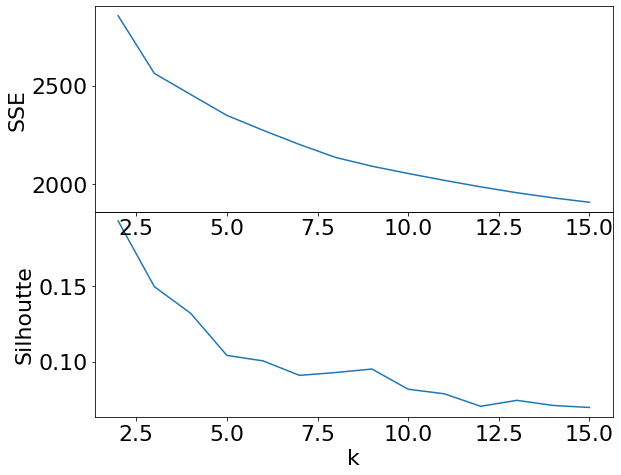

In [78]:
sse_audio_tracks, sil_audio_tracks = plot_silhouettes_and_sses(audio_tracks, 15)

Parece haber dado muy parecido a audio_features.

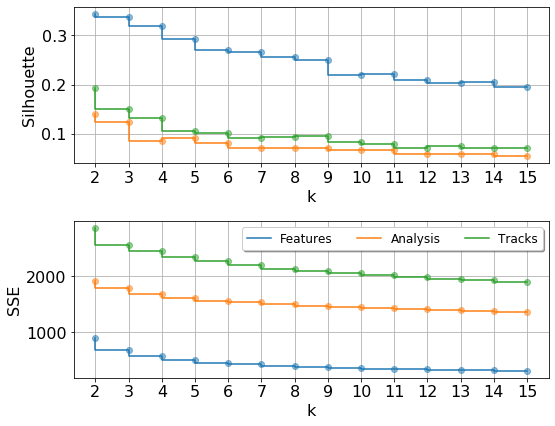

In [79]:
 %reload_ext autoreload
data_sil = [[sil_audio_features, 'Features'], [sil_audio_analysis[0:14], 'Analysis'], [sil_audio_tracks, 'Tracks']]
data_sse = [[sse_audio_features, 'Features'], [sse_audio_analysis[0:14], 'Analysis'], [sse_audio_tracks, 'Tracks']]
plot_all_silhouettes_and_sses(data_sil, data_sse)


In [80]:
sils_sses = []
for k in range(3, 7):
    sils_sses.append([k, get_silhouette_avg(audio_tracks, k), get_sse(audio_tracks, k)])
pd.DataFrame(sils_sses, columns=['k', 'silhouette', 'sse'])

,k,silhouette,sse
0,3,0.149567,2562.292213
1,4,0.132010,2455.423303
2,5,0.104156,2349.021097
3,6,0.100526,2273.397730


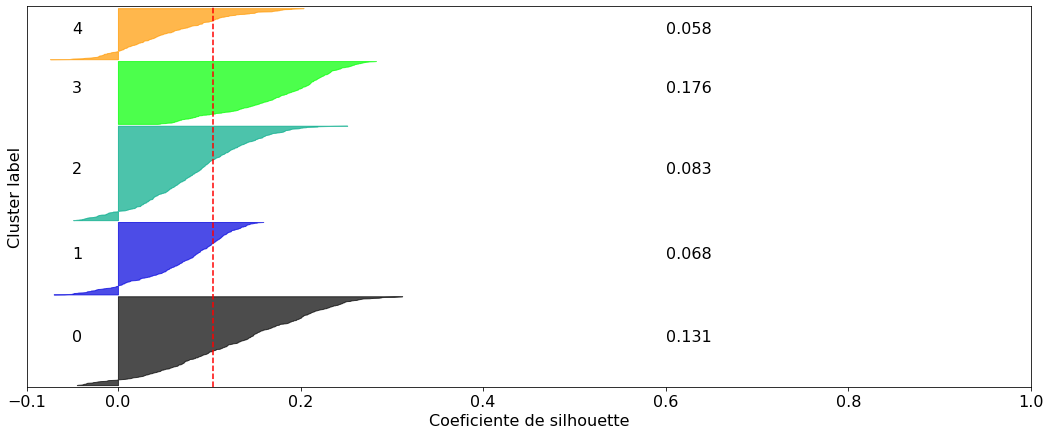

In [81]:
plot_silhouette(audio_tracks, 5)

De vuelta, audio_tracks da prácticamente lo mismo que audio_features. Parece que los summaries de audio_analysis no influyen mucho en los resultados de KMeans.

## b) Evaluar si los agrupamientos son similares para los distintos conjuntos de datos utilizando la matriz de confusión y los índices de Rand y van Dongen en los casos que correspondan

### Matrices de confusión

In [82]:
# Para que las comparaciones sean del mismo largo,
# se remueve de audio_feature el track que no se encuentra en audio_analysis
merged = audio_features.merge(audio_analysis_original, how = 'left', on = 'id')
id_to_remove = merged[merged.timbre_mean_0.isnull()].index[0]
id_to_remove
audio_features_minus_one = audio_features.drop(id_to_remove, axis = 0)
audio_features_minus_one.shape

(2205, 10)

In [83]:
# Se ordenan los tres datasets para que los tracks estén en el mismo orden
audio_features_sorted = audio_features_minus_one.sort_index()
audio_analysis_sorted = audio_analysis_original.sort_index()
audio_tracks_sorted = audio_tracks.sort_index()



In [84]:
# Los vuelvo a estandarizar
audio_features_sorted = pd.DataFrame(scaler.fit_transform(audio_features_sorted))
audio_analysis_sorted = pd.DataFrame(scaler.fit_transform(audio_analysis_sorted))
audio_tracks_sorted = pd.DataFrame(scaler.fit_transform(audio_tracks_sorted))

In [85]:
# Vamos a comparar todos los KMeans con k = 5
km_audio_features = KMeans(n_clusters = 5, random_state = 10).fit(audio_features_sorted)
km_audio_analysis = KMeans(n_clusters = 5, random_state = 10).fit(audio_analysis_sorted)
km_audio_tracks = KMeans(n_clusters = 5, random_state = 10).fit(audio_tracks_sorted)

In [86]:
# Matriz de confusión: audio_features VS audio_analysis
tmp1 = pd.DataFrame({'audio_features': km_audio_features.labels_, 'audio_analysis': km_audio_analysis.labels_})
ct1 = pd.crosstab(tmp1['audio_features'], tmp1['audio_analysis'])
ct1

audio_analysis,0,1,2,3,4
audio_features,,,,,
0,35,263,221,108,182
1,268,14,21,91,26
2,7,52,40,146,41
3,300,1,2,36,4
4,74,13,17,226,17


In [87]:
# Matriz de confusión: audio_features VS audio_tracks
tmp2 = pd.DataFrame({'audio_features': km_audio_features.labels_, 'audio_tracks': km_audio_tracks.labels_})
ct2 = pd.crosstab(tmp2['audio_features'], tmp2['audio_tracks'])
ct2

audio_tracks,0,1,2,3,4
audio_features,,,,,
0,182,166,207,148,106
1,112,82,102,69,55
2,64,54,80,47,41
3,80,61,89,57,56
4,92,69,85,54,47


In [88]:
# Matriz de confusión: audio_tracks VS audio_analysis
tmp3 = pd.DataFrame({'audio_tracks': km_audio_tracks.labels_, 'audio_analysis': km_audio_analysis.labels_})
ct3 = pd.crosstab(tmp3['audio_tracks'], tmp3['audio_analysis'])
ct3

audio_analysis,0,1,2,3,4
audio_tracks,,,,,
0,175,72,68,148,67
1,125,67,62,130,48
2,173,90,71,157,72
3,112,65,58,101,39
4,99,49,42,71,44


Como ya se había visto, el etiquetado de audio_features es exactamente igual que el etiquetado de audio_tracks. Lo que significa que a KMeans le da lo mismo que las variables resumen de audio_analysis estén o no en el dataset.

Los elementos que están en la diagonal son los aciertos. O sea: los que ambos modelos que se están comparando etiquetaron igual.

### Criterio de van Dongen

In [89]:
vanDongen(ct1)

0.6907781967775112

In [90]:
vanDongen(ct2)

0.9944042132982225

In [91]:
vanDongen(ct3)

0.9977869111602908

### Índices Rand

In [92]:
# audio_features VS audio_analysis
adjusted_rand_score(km_audio_features.labels_, km_audio_analysis.labels_)

0.1792343715851831

In [93]:
# audio_features VS audio_tracks
adjusted_rand_score(km_audio_features.labels_, km_audio_tracks.labels_)

-0.001036002461806807

In [94]:
# audio_analysis VS audio_tracks
adjusted_rand_score(km_audio_analysis.labels_, km_audio_tracks.labels_)

0.0004116498556415081

## c) Evaluar para los mejores casos si los clusters se coindicen con el género (columna de metadata)

Se testea primero con el que se cree que fue clustering, el de audio_features.

In [95]:
# Se remueve el track que no está en audio_analysis
metadata_minus_one = metadata_original.drop(id_to_remove, axis = 0)

# Se ordenan los index de metadata
metadata_sorted = metadata_minus_one.sort_index()
metadata_sorted.shape

(2205, 17)

In [96]:
# Se calcula la matriz de confusión
tmp4 = pd.DataFrame({'Generos': metadata_sorted.genre, 'audio_features': km_audio_features.labels_})
ct4 = pd.crosstab(tmp4['Generos'], tmp4['audio_features'])
ct4

audio_features,0,1,2,3,4
Generos,,,,,
ambient,297,118,33,9,3
classical,320,0,78,0,7
drum-and-bass,0,229,0,221,1
jazz,116,47,115,18,130
world-music,76,26,60,95,206


In [97]:
# Se calcula el criterio de van Dongen
vanDongen(ct4)

0.6810070108349267

In [98]:
# Se calcula el índice de rand
adjusted_rand_score(metadata_sorted.genre, km_audio_features.labels_)

0.2271243147357393

Se testea también, por las dudas, audio_analysis.

In [99]:
# Se calcula la matriz de confusión
tmp5 = pd.DataFrame({'Generos': metadata_sorted.genre, 'audio_analysis': km_audio_analysis.labels_})
ct5 = pd.crosstab(tmp5['Generos'], tmp5['audio_analysis'])
ct5

audio_analysis,0,1,2,3,4
Generos,,,,,
ambient,60,125,133,47,95
classical,18,162,105,28,92
drum-and-bass,407,0,4,39,1
jazz,65,21,29,294,17
world-music,134,35,30,199,65


In [100]:
# Se calcula el criterio de van Dongen
vanDongen(ct5)

0.6509347226478701

In [101]:
# Se calcula el índice de rand
adjusted_rand_score(metadata_sorted.genre, km_audio_analysis.labels_)

0.23502848662663195

Y probemos con audio_tracks

In [102]:
# Se calcula la matriz de confusión
tmp6 = pd.DataFrame({'Generos': metadata_sorted.genre, 'audio_tracks': km_audio_tracks.labels_})
ct6 = pd.crosstab(tmp6['Generos'], tmp6['audio_tracks'])
ct6

audio_tracks,0,1,2,3,4
Generos,,,,,
ambient,108,94,110,76,72
classical,81,80,111,77,56
drum-and-bass,115,85,111,81,59
jazz,114,86,105,66,55
world-music,112,87,126,75,63


In [103]:
# Se calcula el criterio de van Dongen
vanDongen(ct6)

0.9887706855791962

In [104]:
# Se calcula el índice de rand
adjusted_rand_score(metadata_sorted.genre, km_audio_tracks.labels_)

-0.0005541971740418097

## d) Visualizar los clusters y las etiquetas de género en baja dimensión con alguna técnica de reducción (PCA, TSNE, MDS, etc)

In [105]:
metadata_sorted.genre.head()

id
00At7PWydsvg7g5xgaYan9    drum-and-bass
00BgcUYkIImsDN5rNjkR1U    drum-and-bass
00WgnFIsY1y84p7mYAJRuF    drum-and-bass
00isAURAZeKQXv6CW2vckb        classical
00ne3qRgc0JqY6MNYfhWri        classical
Name: genre, dtype: object

In [106]:
genres = []
for genre in metadata_sorted.genre:
    if genre == 'ambient':
        genres.append(4)
    if genre == 'classical':
        genres.append(1)
    if genre == 'drum-and-bass':
        genres.append(2)
    if genre == 'jazz':
        genres.append(3)
    if genre == 'world-music':
        genres.append(0)
len(genres)


2205

## TSNE

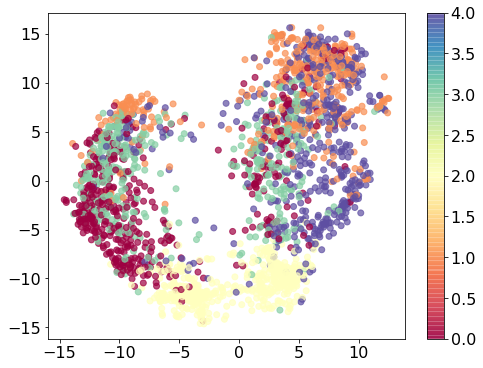

In [120]:
tsne = TSNE(n_components=2,perplexity=200)
Xred = tsne.fit_transform(audio_features_sorted)

plt.scatter(Xred[:,0], Xred[:,1], c=genres, cmap=plt.cm.Spectral, alpha=0.7)
plt.colorbar()

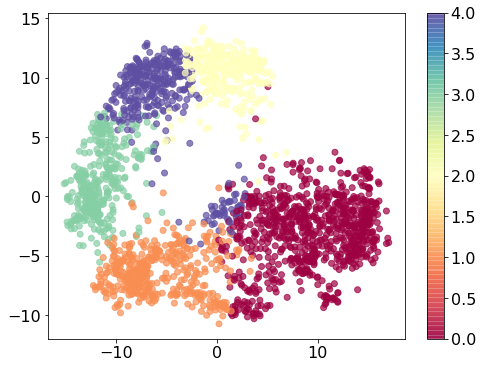

In [119]:
tsne = TSNE(n_components=2,perplexity=200)
Xred = tsne.fit_transform(audio_features_sorted)
plt.scatter(Xred[:,0], Xred[:,1], c=km_audio_features.labels_, cmap=plt.cm.Spectral, alpha=0.7)
plt.colorbar()

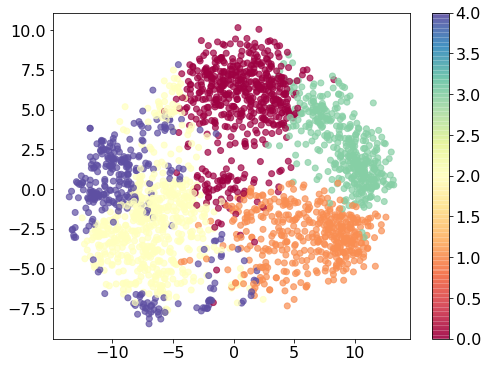

In [109]:
tsne = TSNE(n_components=2,perplexity=200)
Xred = tsne.fit_transform(audio_tracks_sorted)
plt.scatter(Xred[:,0], Xred[:,1], c=km_audio_tracks.labels_, cmap=plt.cm.Spectral, alpha=0.7)
plt.colorbar()

## UMAP

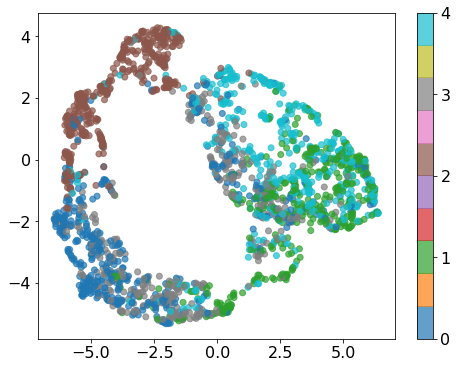

In [110]:
um = UMAP()
Xred = um.fit_transform(audio_features_sorted)
plt.scatter(Xred[:,0],Xred[:,1],c=genres,cmap=plt.cm.tab10,alpha=0.7)
plt.colorbar(ticks=range(6));

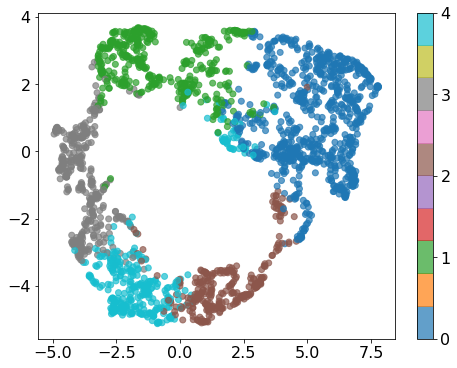

In [111]:
um = UMAP()
Xred = um.fit_transform(audio_features_sorted)
plt.scatter(Xred[:,0],Xred[:,1],c=km_audio_features.labels_,cmap=plt.cm.tab10,alpha=0.7)
plt.colorbar(ticks=range(6));

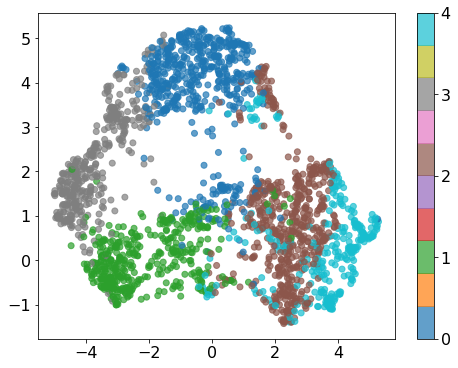

In [112]:
um = UMAP()
Xred = um.fit_transform(audio_tracks_sorted)
plt.scatter(Xred[:,0],Xred[:,1],c=km_audio_tracks.labels_,cmap=plt.cm.tab10,alpha=0.7)
plt.colorbar(ticks=range(6));